<a href="https://colab.research.google.com/github/ajayostawal/dimensional_reduction/blob/main/linear_regression_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [46]:
housing  = pd.DataFrame(pd.read_csv("/content/Housing.csv"))

In [47]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [49]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

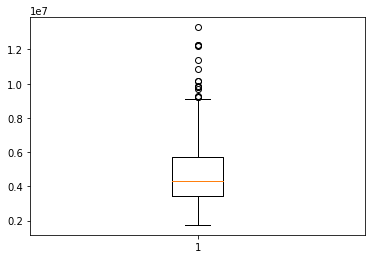

In [50]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]


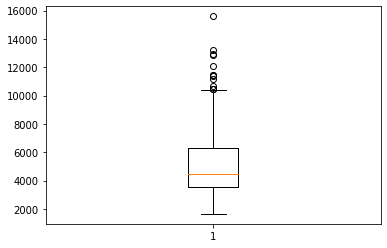

In [51]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]


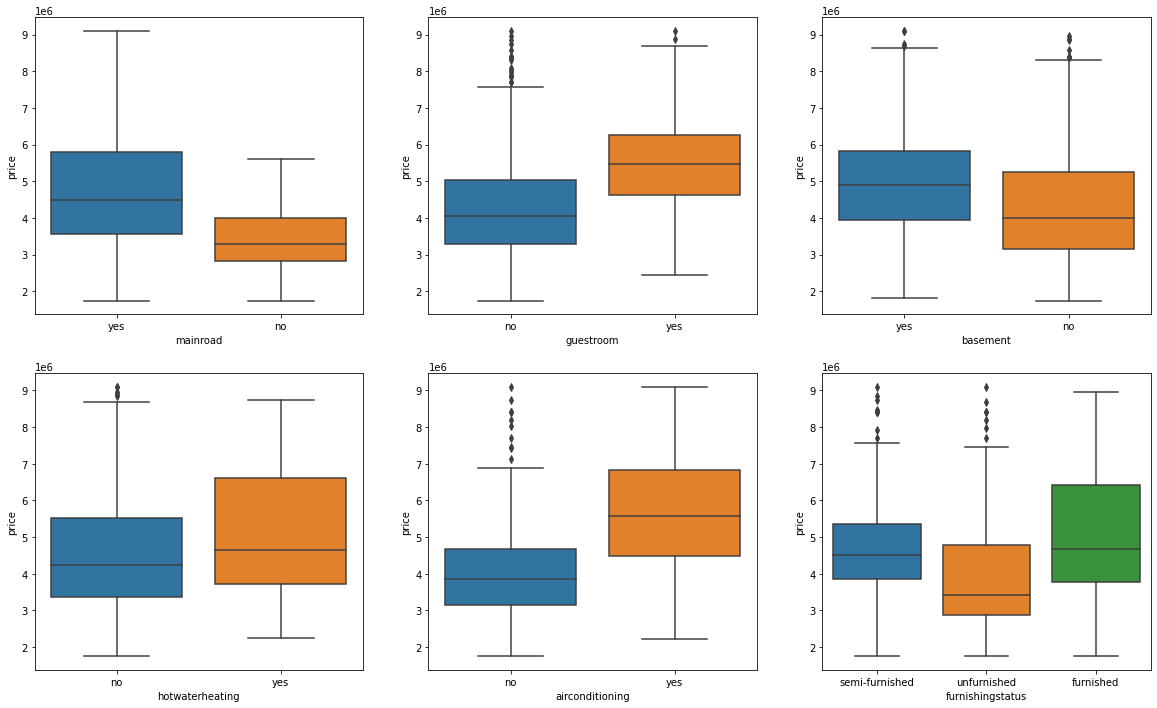

In [52]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [53]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [54]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [55]:
status = pd.get_dummies(housing['furnishingstatus'])


In [56]:
status.head()


,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [57]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)


In [58]:
status

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [59]:
housing = pd.concat([housing, status], axis = 1)


In [60]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)


In [61]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [62]:
X=housing.iloc[:,1:]
Y=housing.iloc[:,0]

In [63]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,6420,3,2,2,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [64]:
Y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 517, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [130]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,6360,3,1,3,1,0,0,0,0,0,1,1,0
236,2870,2,1,2,1,1,1,0,0,0,1,1,0
356,2520,5,2,1,0,0,1,0,1,1,0,0,0
425,3185,2,1,1,1,0,1,0,0,2,0,0,0
516,3240,2,1,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,5885,2,1,1,1,0,0,0,1,1,0,0,1
307,4080,3,1,2,1,0,0,0,0,2,0,1,0
72,5020,3,1,4,1,0,0,0,1,0,1,0,1
377,2850,3,2,2,0,0,1,0,0,0,1,0,1


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [132]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.470727,0.2,0.0,0.000000,1,0,0,0,1,0.333333,0,0,1
307,0.257244,0.4,0.0,0.333333,1,0,0,0,0,0.666667,0,1,0
72,0.368421,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1,0,1
377,0.111768,0.4,0.5,0.333333,0,0,1,0,0,0.000000,1,0,1


In [133]:
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [134]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
244,0.427241,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
287,0.448196,0.333333,0.0,0.333333,1,0,0,0,1,0.000000,0,0,1
166,0.715949,0.333333,0.0,0.000000,1,0,1,0,1,0.666667,1,0,1
176,0.799767,0.333333,0.0,0.000000,1,0,0,0,1,0.666667,0,0,0
282,0.061118,0.333333,0.0,0.333333,0,1,1,0,1,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.278231,0.000000,0.0,0.333333,1,0,0,0,0,0.333333,0,1,0
36,0.678929,0.333333,0.5,0.666667,1,0,0,1,0,0.333333,1,0,0
298,0.483120,0.333333,0.0,0.000000,1,0,0,1,0,0.666667,0,1,0
435,0.278231,0.000000,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1


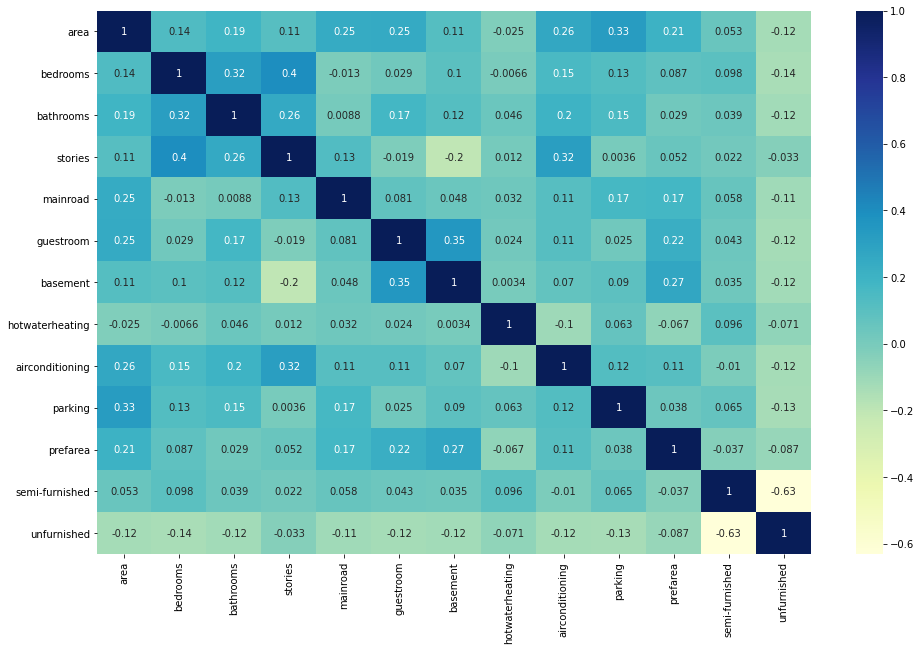

In [135]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [138]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm



In [139]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.05))
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [140]:
sel.get_support()


array([False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [141]:
constant_clounms = [column for column in X_train.columns if column not in X_train.columns[sel.get_support()]]
print(len(constant_clounms))

3


In [142]:
for feature in constant_clounms:
    print(feature)



area
bedrooms
hotwaterheating


In [146]:
X_train=X_train.drop(constant_clounms,axis=1)

In [147]:
X_train.shape

(361, 10)

In [144]:
X_test.shape

(156, 13)

In [145]:
sel.transform(X_test)

array([[0.        , 0.33333333, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [149]:
sel.get_support()
constant_clounms = [column for column in X_test.columns if column not in X_test.columns[sel.get_support()]]
print(len(constant_clounms))

for feature in constant_clounms:
    print(feature)

X_test=X_test.drop(constant_clounms,axis=1)

3
area
bedrooms
hotwaterheating


In [150]:
X_test.shape

(156, 10)

In [153]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     46.72
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.60e-58
Time:                        10:20:46   Log-Likelihood:                -5502.3
No. Observations:                 361   AIC:                         1.103e+04
Df Residuals:                     350   BIC:                         1.107e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.763e+06   2.02e+05     13.675      0.000    2.37e+06    3.16e+06
bathrooms        1.479e+06    2.6e+05      5.687      0.000    9.68e+05    1.99e+06
stories          1.539e+06   2.12e+05      7.251      0.000    1.12e+06    1.96e+06
mainroad         5.646e+05    1.7e+05      3.315      0.001     2.3e+05       9e+05
guestroom        3.619e+05   1.58e+05      2.297      0.022     5.2e+04    6.72e+05
basement         2.875e+05   1.29e+05      2.237      0.026    3.48e+04     5.4e+05
airconditioning  8.126e+05   1.27e+05      6.410      0.000    5.63e+05    1.06e+06
parking          1.066e+06   1.95e+05      5.461      0.000    6.82e+05    1.45e+06
prefarea         7.715e+05   1.43e+05      5.405      0.000    4.91e+05    1.05e+06
semi-furnished   5.771e+04   1.41e+05      0.409      0.683    -2.2e+05    3.35e+05
unfurnished     -4.128e+05   1.56e+05     -2.639      0.009   -7.21e+05   -1.05e+05
==============================================================================
Omnibus:                       50.828   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.767
Skew:                           0.780   Prob(JB):                     5.89e-22
Kurtosis:                       5.016   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
X_test = sm.add_constant(X_test)
results = sm.OLS(Y_test, X_test).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     32.72
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.08e-32
Time:                        10:32:04   Log-Likelihood:                -2368.3
No. Observations:                 156   AIC:                             4759.
Df Residuals:                     145   BIC:                             4792.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.534e+06   2.76e+05      9.192      0.000    1.99e+06    3.08e+06
bathrooms        2.574e+06   3.57e+05      7.201      0.000    1.87e+06    3.28e+06
stories          1.033e+06   3.24e+05      3.188      0.002    3.93e+05    1.67e+06
mainroad         8.253e+05   2.16e+05      3.823      0.000    3.99e+05    1.25e+06
guestroom        8.205e+05   2.31e+05      3.549      0.001    3.64e+05    1.28e+06
basement         2.033e+05   1.96e+05      1.038      0.301   -1.84e+05     5.9e+05
airconditioning  1.176e+06   1.85e+05      6.369      0.000    8.11e+05    1.54e+06
parking          1.041e+06   3.14e+05      3.312      0.001     4.2e+05    1.66e+06
prefarea          2.83e+05   1.95e+05      1.450      0.149   -1.03e+05    6.69e+05
semi-furnished   1.111e+05   2.22e+05      0.500      0.618   -3.28e+05    5.51e+05
unfurnished     -3.484e+05   2.03e+05     -1.718      0.088   -7.49e+05    5.25e+04
==============================================================================
Omnibus:                        5.613   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.725
Skew:                           0.227   Prob(JB):                       0.0347
Kurtosis:                       3.910   Cond. No.                         8.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
lm.score(X_train,Y_train)


0.57172157580803

In [159]:
y_train_price = lm.predict(X_train)


(361,)

In [167]:
X_test.head()

,const,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,semi-furnished,unfurnished
244,1.0,0.0,0.333333,1,1,1,0,0.000000,1,1,0
287,1.0,0.0,0.333333,1,0,0,1,0.000000,0,0,1
166,1.0,0.0,0.000000,1,0,1,1,0.666667,1,0,1
176,1.0,0.0,0.000000,1,0,0,1,0.666667,0,0,0
282,1.0,0.0,0.333333,0,1,1,1,0.000000,0,0,1


In [166]:
predictions = lm.predict(X_test)


In [170]:
from sklearn.metrics import r2_score 
r2_score(Y_test,predictions)

0.6342911563327245

Text(0, 0.5, 'predictions')

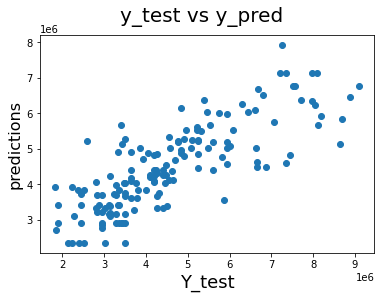

In [171]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,predictions)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('predictions', fontsize=16)    